In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('treebank')

sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', 50)

[nltk_data] Downloading package treebank to /Users/june/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [2]:
# Import a data that does not contain word vectors
df_data = pd.read_csv('./data_notembeded.csv')
df_data_rt = pd.read_csv('./data_rt_notembeded.csv')
raw_text = pd.read_csv('./raw_text_tokens.csv')

In [3]:
print("Shape of the Root Tweets Data are: {}".format(df_data.shape))
print("Shape of the Reaction Tweets Data are: {}".format(df_data_rt.shape))

Shape of the Root Tweets Data are: (5802, 35)
Shape of the Reaction Tweets Data are: (123766, 33)


In [6]:
df_data.columns[0:23]

Index(['text', 'hasURL', 'urls', 'urls_expanded', 'hasUserURL', 'user_url',
       'text_token', 'isNotOnlyText', 'Noun', 'Verb', 'Adjective', 'Pronoun',
       'FirstPersonPronoun', 'SecondPersonPronoun', 'ThirdPersonPronoun',
       'Adverb', 'Numeral', 'Conjunction_inj', 'Particle', 'Determiner',
       'Modal', 'Whs', 'char_count'],
      dtype='object')

In [7]:
y = df_data.isRumor
y_rt = df_data_rt.isRumor

AttributeError: 'DataFrame' object has no attribute 'isRumor'

---

In [16]:
# import string, re
# result = str(raw_text.drop('text',axis=1)).translate(str.maketrans('', '', string.punctuation))#.replace('\n','')
# result = re.sub(r'([\n])\d+', '', result)

In [9]:
df_data.head()

,text,hasURL,urls,urls_expanded,hasUserURL,user_url,text_token,isNotOnlyText,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,Numeral,Conjunction_inj,Particle,Determiner,Modal,Whs,char_count,word_count,has_question,has_exclaim,has_period,capital_ratio,tweet_count,listed_count,follow_ratio,age,verified,isRumor,isRumor.1
0,BREAKING: Armed man takes hostage in kosher gr...,1,['http://t.co/PBs3sMwhLt'],['http://htz.li/1lI'],1,http://www.haaretz.com,"['breaking', 'armed', 'man', 'takes', 'hostage...",1,6,3,0,0,0,0,0,0,0,2,0,0,0,0,88,11,0,0,1,0.159091,4.803286,3.855943,5.287349,2126,1,1,1
1,"#CharlieHebdo killers dead, confirmed by genda...",0,[],[],1,http://www.agnespoirier.org,"['charliehebdo', 'killers', 'dead', 'confirmed...",0,2,1,2,0,0,0,0,0,0,1,0,0,0,0,53,6,0,0,1,0.037736,3.031812,2.146128,3.672929,1050,0,1,1
2,"Top French cartoonists Charb, Cabu, Wolinski, ...",0,[],[],1,http://t.co/EWb7m4orG8,"['top', 'french', 'cartoonists', 'charb', 'cab...",0,3,4,8,0,0,0,0,1,0,2,0,0,0,0,136,18,0,0,1,0.073529,3.856245,2.879669,4.309651,2030,0,1,1
3,Police have surrounded the area where the #Cha...,1,"['http://t.co/3tGXEIX4F2', 'https://t.co/aBSez...","['http://cnn.it/1xYDHvp', 'https://amp.twimg.c...",1,http://www.cnn.com,"['police', 'have', 'surrounded', 'the', 'area'...",1,5,5,0,0,0,0,0,0,0,0,0,2,0,1,138,14,0,0,1,0.101449,4.735814,5.009820,7.187664,2891,1,1,1
4,PHOTO: Armed gunmen face police officers near ...,1,['http://t.co/3Jsosc7yl3'],['http://on.rt.com/k5ivya'],1,http://t.co/bDDyvy9DmR,"['photo', 'armed', 'gunmen', 'face', 'police',...",1,7,2,0,0,0,0,0,0,0,2,0,0,0,0,117,11,0,0,1,0.145299,5.021181,4.132996,5.925434,1975,1,1,1


In [10]:
df_data.columns

Index(['text', 'hasURL', 'urls', 'urls_expanded', 'hasUserURL', 'user_url',
       'text_token', 'isNotOnlyText', 'Noun', 'Verb', 'Adjective', 'Pronoun',
       'FirstPersonPronoun', 'SecondPersonPronoun', 'ThirdPersonPronoun',
       'Adverb', 'Numeral', 'Conjunction_inj', 'Particle', 'Determiner',
       'Modal', 'Whs', 'char_count', 'word_count', 'has_question',
       'has_exclaim', 'has_period', 'capital_ratio', 'tweet_count',
       'listed_count', 'follow_ratio', 'age', 'verified', 'isRumor',
       'isRumor.1'],
      dtype='object')

In [11]:
df_data[['capital_ratio', 'word_count', 'has_question', 'has_exclaim', 'has_period', 'tweet_count', 'listed_count', 'follow_ratio', 'age', 'verified']].describe()

,capital_ratio,word_count,has_question,has_exclaim,has_period,tweet_count,listed_count,follow_ratio,age,verified
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000
mean,0.092076,15.197346,0.046191,0.036367,0.908135,4.376900,3.084451,4.904886,1850.082213,0.556188
std,0.070563,4.905995,0.209917,0.187217,0.288860,0.665866,1.111977,1.198252,706.821146,0.496876
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.602060,0.000000,1.146128,0.000000,0.000000
25%,0.052106,12.000000,0.000000,0.000000,1.000000,4.012151,2.328380,4.025552,1384.000000,0.000000
50%,0.081081,15.000000,0.000000,0.000000,1.000000,4.451126,3.079181,4.883905,2011.000000,1.000000
75%,0.115108,19.000000,0.000000,0.000000,1.000000,4.926535,3.929559,5.866769,2306.500000,1.000000
max,0.909091,31.000000,1.000000,1.000000,1.000000,5.716055,6.357100,7.403174,3094.000000,1.000000


In [12]:
df_data.loc[df_data.age == 0]

,text,hasURL,urls,urls_expanded,hasUserURL,user_url,text_token,isNotOnlyText,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,Numeral,Conjunction_inj,Particle,Determiner,Modal,Whs,char_count,word_count,has_question,has_exclaim,has_period,capital_ratio,tweet_count,listed_count,follow_ratio,age,verified,isRumor,isRumor.1
1458,We're not responsible of http://t.co/SBWJDNXpj...,1,['http://t.co/SBWJDNXpjH'],['http://www.opcharliehebdo.com/'],1,http://pastebin.com/svfKFiAB,"['were', 'not', 'responsible', 'of', 'this', '...",1,4,3,2,1,0,0,1,2,0,2,0,3,0,0,138,17,0,1,1,0.130435,1.176091,1.000000,3.380211,0,0,0,0
2038,Support meetings all around the world. Check h...,1,['http://t.co/SqQHT2nB2L'],['http://www.lemonde.fr/les-decodeurs/visuel/2...,1,http://t.co/jrTidWZoPJ,"['support', 'meetings', 'all', 'around', 'the'...",1,6,0,0,0,0,0,0,0,0,1,0,2,0,0,119,9,0,0,1,0.134454,1.602060,2.082785,4.694684,0,0,0,0


In [ ]:
df_data

In [166]:
df_data_rt.head()

,text,hasURL,urls,urls_expanded,hasUserURL,user_url,text_token,isNotOnlyText,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,Numeral,Conjunction_inj,Particle,Determiner,Modal,Whs,char_count,word_count,has_question,has_exclaim,has_period,capital_ratio,tweet_count,listed_count,follow_ratio,age,verified
0,“@haaretzcom: BREAKING: Armed man takes hostag...,1.0,['http://t.co/SvpMxBoLsn'],['http://htz.li/1lI'],1.0,NaN,"['haaretzcom', 'breaking', 'armed', 'man', 'ta...",1.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,116.0,13.0,0.0,0.0,1.0,0.120690,5.010406,1.518514,3.112605,1391.0,0.0
1,@haaretzcom @AhmetHez to kill is right? How da...,0.0,[],[],1.0,NaN,"['haaretzcom', 'ahmethez', 'to', 'kill', 'is',...",0.0,7.0,5.0,2.0,4.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,3.0,133.0,25.0,1.0,0.0,0.0,0.022556,3.361161,0.000000,2.212188,2.0,0.0
2,@haaretzcom @AhmetHez play back infront of ur ...,0.0,[],[],1.0,NaN,"['haaretzcom', 'ahmethez', 'play', 'back', 'in...",0.0,10.0,2.0,2.0,4.0,0.0,2.0,2.0,1.0,0.0,5.0,0.0,0.0,1.0,2.0,140.0,27.0,0.0,0.0,0.0,0.014286,3.361161,0.000000,2.212188,2.0,0.0
3,@ohohyesyesnono @haaretzcom Bots will conquest...,0.0,[],[],1.0,NaN,"['ohohyesyesnono', 'haaretzcom', 'bots', 'will...",0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,61.0,8.0,0.0,0.0,1.0,0.016393,5.056325,0.954243,2.530200,68.0,0.0
4,@haaretzcom @AhmetHez you must be paranoid to ...,0.0,[],[],1.0,NaN,"['haaretzcom', 'ahmethez', 'you', 'must', 'be'...",0.0,5.0,6.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,130.0,22.0,0.0,0.0,0.0,0.100000,3.361161,0.000000,2.212188,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123761,@ABCReligion Gotta love the Aussies. Gorgeous.,0.0,[],[],1.0,http://t.co/nftwCiXX27,"['abcreligion', 'got', 'ta', 'love', 'the', 'a...",0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,47.0,7.0,0.0,0.0,1.0,0.148936,3.952696,1.579784,3.262925,830.0,0.0
123762,@effeminate_guy @ABCReligion not this time aro...,0.0,[],[],1.0,http://t.co/n0MnJ5BH2W,"['effeminateguy', 'abcreligion', 'not', 'this'...",0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,50.0,6.0,0.0,1.0,0.0,0.080000,3.868174,1.041393,2.938019,657.0,0.0
123763,.@ABCReligion racism or anti-religious? Muslim...,0.0,[],[],1.0,NaN,"['abcreligion', 'racism', 'or', 'antireligious...",0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,74.0,9.0,1.0,0.0,1.0,0.094595,5.021437,1.740363,2.806180,1286.0,0.0
123764,@JezNews via @ABCReligion Australians respond...,0.0,[],[],1.0,NaN,"['jeznews', 'via', 'abcreligion', 'australians...",0.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,128.0,14.0,0.0,0.0,1.0,0.078125,3.784475,1.477121,2.784617,1126.0,0.0


In [ ]:
sns.distplot(df_data['text'].apply(len), kde=True, rug=True)
sns.distplot(df_data_rt['text'].apply(str).apply(len), kde=True, rug=True)
plt.title("Length of the tweets from Root and Reaction sets")
plt.show()

In [ ]:
sns.violinlot(df_data['text'].apply(len))
plt.title("Length of the tweets from Root and Reaction sets")
plt.show()
sns.violinlot(df_data_rt['text'].apply(str).apply(len))
plt.title("Length of the tweets from Root and Reaction sets")
plt.show()

# POS Tagging Data

In [128]:
data_pos = df_data[['text', 'text_token', 'Noun', 'Verb', 'Adjective', 'Pronoun',
       'FirstPersonPronoun', 'SecondPersonPronoun', 'ThirdPersonPronoun',
       'Adverb', 'Numeral', 'Conjunction_inj', 'Particle', 'Determiner',
       'Modal', 'Whs']]

In [129]:
data_pos.shape

(5802, 16)

<AxesSubplot:xlabel='Whs', ylabel='count'>

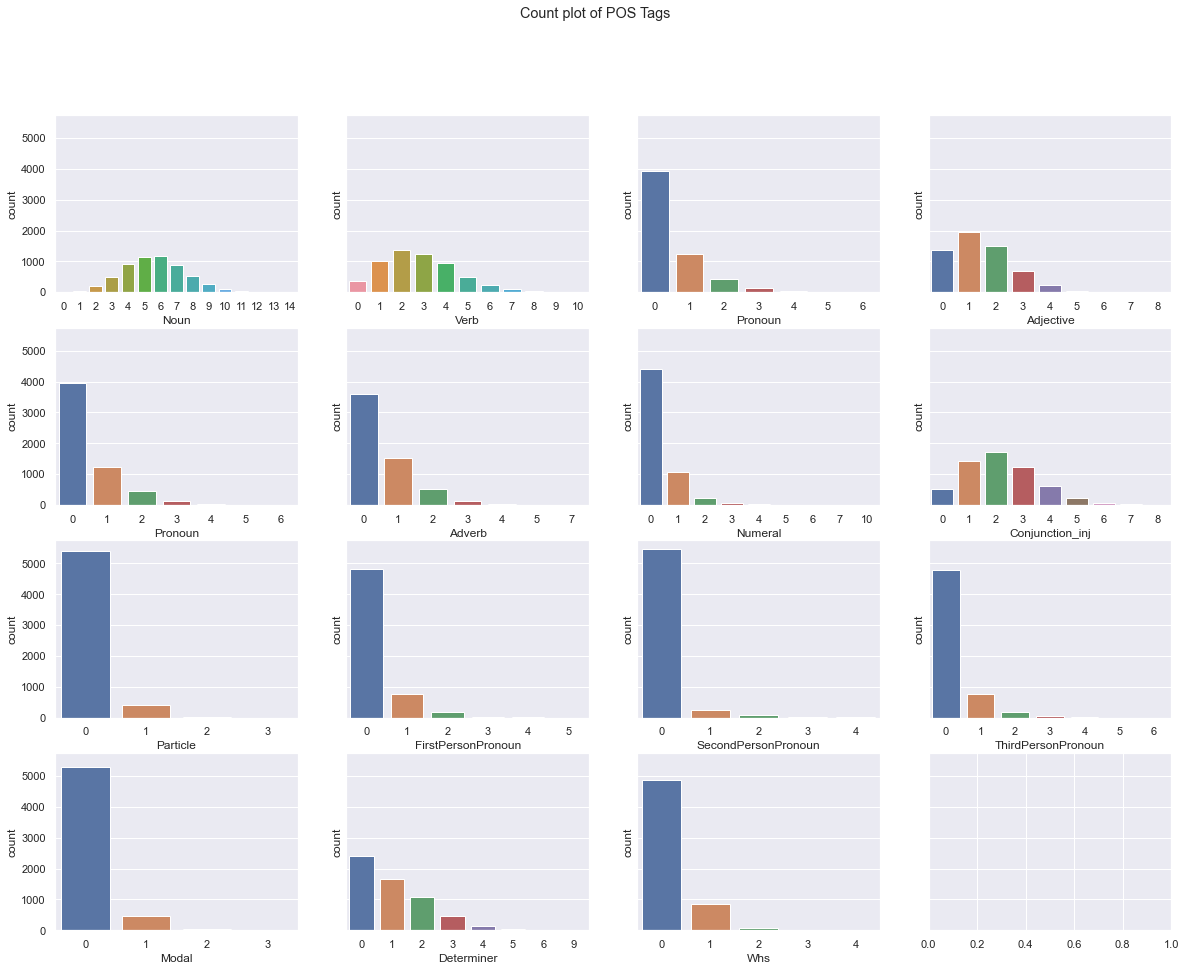

In [130]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15), sharey=True)
fig.suptitle('Count plot of POS Tags')

sns.countplot(ax=axes[0][0], x="Noun", data=data_pos)
sns.countplot(ax=axes[0][1], x="Verb", data=data_pos)
sns.countplot(ax=axes[0][2], x="Pronoun", data=data_pos)
sns.countplot(ax=axes[0][3], x="Adjective", data=data_pos)
sns.countplot(ax=axes[1][0], x="Pronoun", data=data_pos)
sns.countplot(ax=axes[1][1], x="Adverb", data=data_pos)
sns.countplot(ax=axes[1][2], x="Numeral", data=data_pos)
sns.countplot(ax=axes[1][3], x="Conjunction_inj", data=data_pos)
sns.countplot(ax=axes[2][0], x="Particle", data=data_pos)
sns.countplot(ax=axes[2][1], x="FirstPersonPronoun", data=data_pos)
sns.countplot(ax=axes[2][2], x="SecondPersonPronoun", data=data_pos)
sns.countplot(ax=axes[2][3], x="ThirdPersonPronoun", data=data_pos)
sns.countplot(ax=axes[3][0], x="Modal", data=data_pos)
sns.countplot(ax=axes[3][1], x="Determiner", data=data_pos)
sns.countplot(ax=axes[3][2], x="Whs", data=data_pos)

In [ ]:
raw_text
tokens = nltk.word_tokenize(re.sub(r'([^\s\w]|_)+','', tweet_text.lower()))
tokens = nltk.TweetTokenizer().tokenize(re.sub(r'([^\s\w]|_)+','', tweet_text.lower()))